In [3]:
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
# statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf
#opening data
import os
import pathlib
import warnings

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [5]:
train = pd.DataFrame()
for i in range(13):
    file_name = 'events_England_' + str(i+1) + '.json'
    path = os.path.join(str(pathlib.Path().resolve().parents[0]),'socceranalytics', 'Wyscout', file_name)
    with open(path) as f:
        data = json.load(f)
    train = pd.concat([train, pd.DataFrame(data)])


In [6]:
file_name = 'events_France.json'
path = os.path.join(str(pathlib.Path().resolve().parents[0]),'socceranalytics', 'Wyscout', file_name)
with open(path) as f:
    data = json.load(f)
train = pd.concat([train, pd.DataFrame(data)])

In [7]:
file_name = 'events_Spain.json'
path = os.path.join(str(pathlib.Path().resolve().parents[0]),'socceranalytics', 'Wyscout', file_name)
with open(path) as f:
    data = json.load(f)
train = pd.concat([train, pd.DataFrame(data)])

In [8]:
file_name = 'events_Germany.json'
path = os.path.join(str(pathlib.Path().resolve().parents[0]),'socceranalytics', 'Wyscout', file_name)
with open(path) as f:
    data = json.load(f)
train = pd.concat([train, pd.DataFrame(data)])

In [9]:
file_name = 'events_Italy.json'
path = os.path.join(str(pathlib.Path().resolve().parents[0]),'socceranalytics', 'Wyscout', file_name)
with open(path) as f:
    data = json.load(f)
train = pd.concat([train, pd.DataFrame(data)])

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3071395 entries, 0 to 647371
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   eventId       int64  
 1   subEventName  object 
 2   tags          object 
 3   playerId      int64  
 4   positions     object 
 5   matchId       int64  
 6   eventName     object 
 7   teamId        int64  
 8   matchPeriod   object 
 9   eventSec      float64
 10  subEventId    object 
 11  id            int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 304.6+ MB


In [16]:
train.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175


In [17]:
shots = train.loc[train['subEventName'] == "Shot"]

In [18]:
shots.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212
62,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,179.854785,100,177959247
91,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,100,177959280
128,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...",7868,"[{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,425.824035,100,177959289
249,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...",7868,"[{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,815.462015,100,177959429


In [21]:
shots["X"] = shots.positions.apply(lambda cell: 100 - cell[0]['x'] * 105/100)
shots["Y"] = shots.positions.apply(lambda cell: cell[0]['y'] * 68/100)
shots["C"] = shots.positions.apply(lambda cell: abs(50 -cell[0]['y']) * 68/100)

In [22]:
shots.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,X,Y,C
46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212,7.60,27.88,6.12
62,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,179.854785,100,177959247,10.75,35.36,1.36
91,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,100,177959280,-0.80,35.36,1.36
128,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...",7868,"[{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,425.824035,100,177959289,14.95,22.44,11.56
249,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...",7868,"[{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,815.462015,100,177959429,21.25,20.40,13.60


In [24]:
shots["Distance"] = np.sqrt(shots["X"]**2 + shots["C"]**2)
shots["Angle"] = np.where(np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32/2)**2)) > 0, 
                          np.arctan(7.32 * shots["X"] /(shots["X"]**2 + shots["C"]**2 - (7.32/2)**2)), 
                          np.arctan(7.32 * shots["X"] /(shots["X"]**2 + shots["C"]**2 - (7.32/2)**2)) + np.pi)
shots["Goal"] = shots.tags.apply(lambda x: 1 if {'id':101} in x else 0).astype(object)


In [28]:
shots.count()

eventId         40461
subEventName    40461
tags            40461
playerId        40461
positions       40461
matchId         40461
eventName       40461
teamId          40461
matchPeriod     40461
eventSec        40461
subEventId      40461
id              40461
X               40461
Y               40461
C               40461
Distance        40461
Angle           40461
Goal            40461
dtype: int64

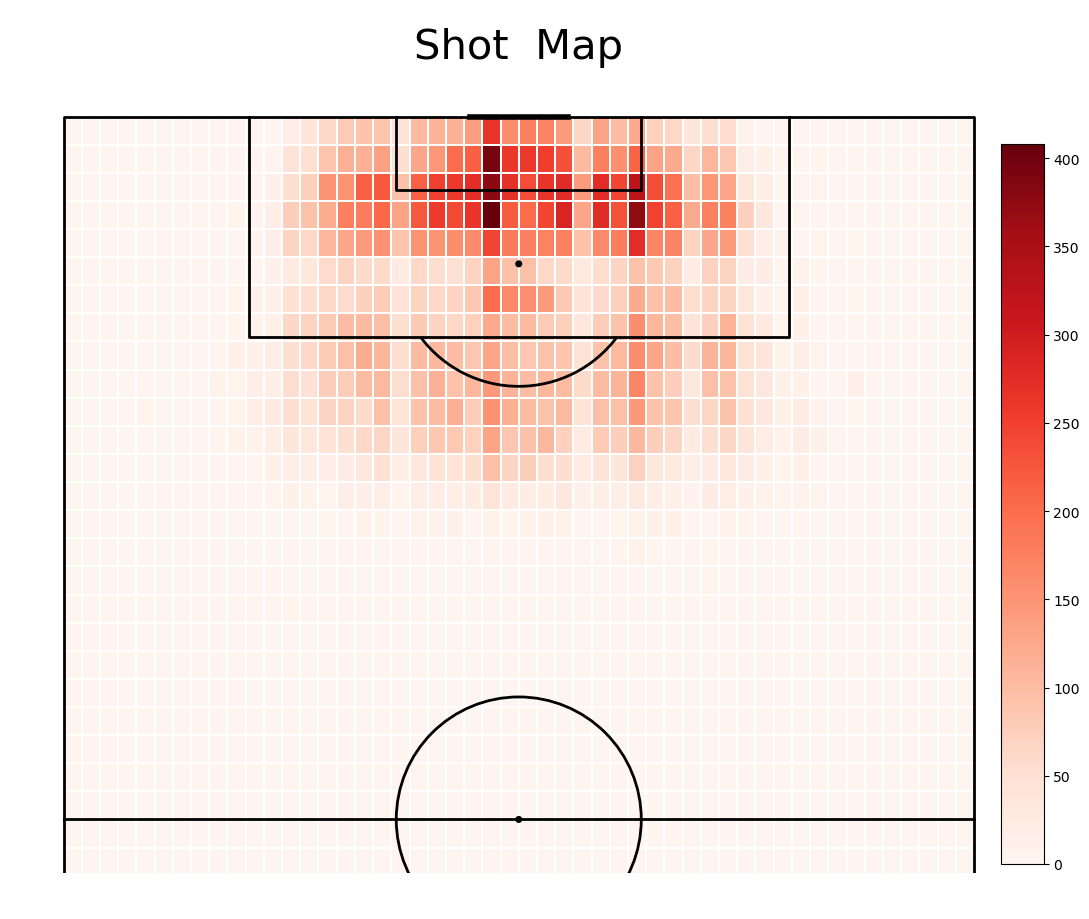

In [34]:
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic_shots = pitch.bin_statistic(105 - shots.X, shots.Y, bins=50)


pcm = pitch.heatmap(bin_statistic_shots, ax=ax["pitch"], cmap='Reds', edgecolor='white', linewidth = 0.01)
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Shot  Map' , fontsize = 30)
plt.show()


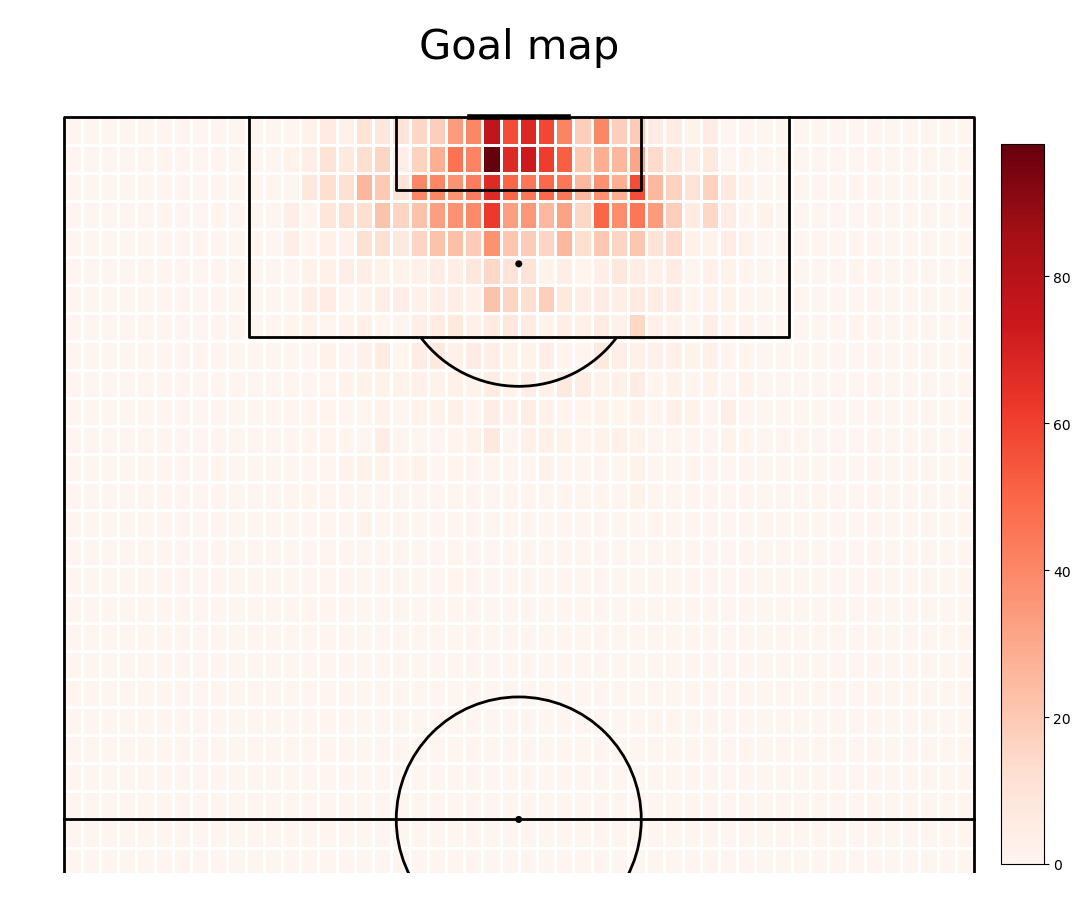

In [36]:
#take only goals
goals = shots.loc[shots["Goal"] == 1]
#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#calculate number of goals in each bin
bin_statistic_goals = pitch.bin_statistic(105 - goals.X, goals.Y, bins=50)
#plot heatmap
pcm = pitch.heatmap(bin_statistic_goals, ax=ax["pitch"], cmap='Reds', edgecolor='white')
#make legend
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Goal map' , fontsize = 30)
plt.show()

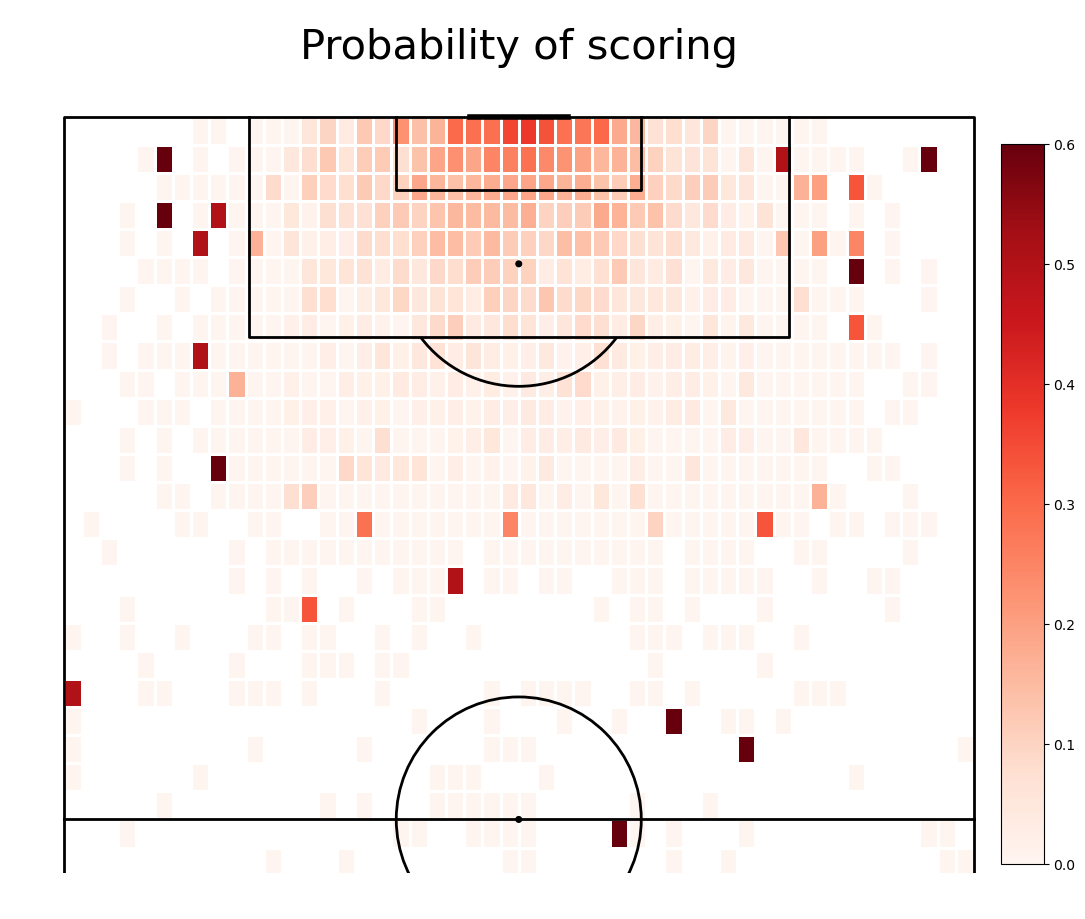

In [37]:
#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic = pitch.bin_statistic(105 - shots.X, shots.Y, bins = 50)
#normalize number of goals by number of shots
bin_statistic["statistic"] = bin_statistic_goals["statistic"]/bin_statistic["statistic"]
#plot heatmap
pcm = pitch.heatmap(bin_statistic, ax=ax["pitch"], cmap='Reds', edgecolor='white', vmin = 0, vmax = 0.6)
#make legend
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Probability of scoring' , fontsize = 30)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

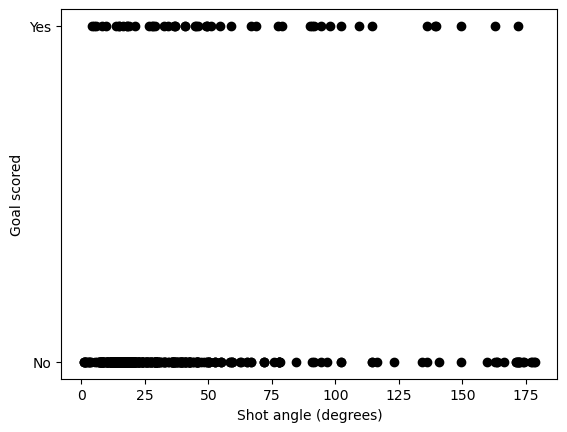

In [38]:
#first 500 shots
shots_500=shots.iloc[:500]
#plot first 200 shots goal angle
fig, ax = plt.subplots()
ax.plot(shots_500['Angle']*180/np.pi, shots_500['Goal'], linestyle='none', marker= '.', markersize= 12, color='black')
#make legend
ax.set_ylabel('Goal scored')
ax.set_xlabel("Shot angle (degrees)")
plt.ylim((-0.05,1.05))
ax.set_yticks([0,1])
ax.set_yticklabels(['No','Yes'])
plt.show

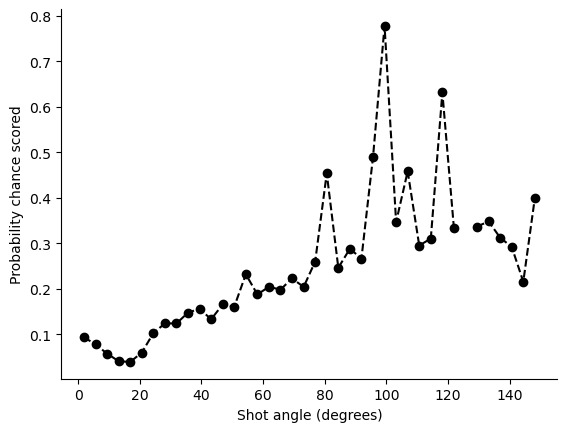

In [67]:
#number of shots from angle
shotcount_dist = np.histogram(shots['Angle']*180/np.pi, bins=40, range=[0, 150])
#number of goals from angle
goalcount_dist = np.histogram(goals['Angle']*180/np.pi, bins=40, range=[0, 150])
np.seterr(divide='ignore', invalid='ignore')
#probability of scoring goal
prob_goal = np.divide(goalcount_dist[0], shotcount_dist[0])
angle = shotcount_dist[1]
midangle = (angle[:-1] + angle[1:])/2
#make plot
fig,ax = plt.subplots()
ax.hist(midangle, prob_goal, linestyle='', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot angle (degrees)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

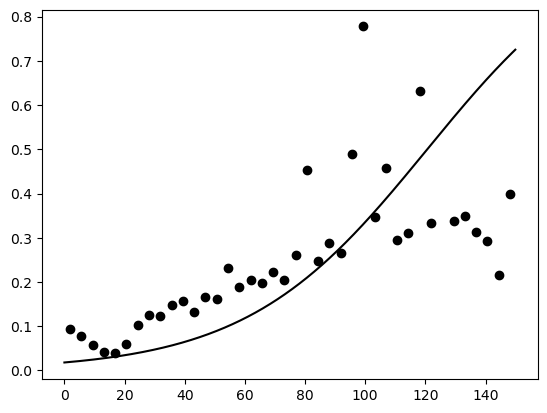

In [58]:
fig, ax = plt.subplots()
b = [4, -1.9]
x = np.arange(150,step=0.1)
y = 1/(1+np.exp(b[0]+b[1]*x*np.pi/180))
#plot line
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
#plot logistic function
ax.plot(x, y, linestyle='solid', color='black')
plt.show()

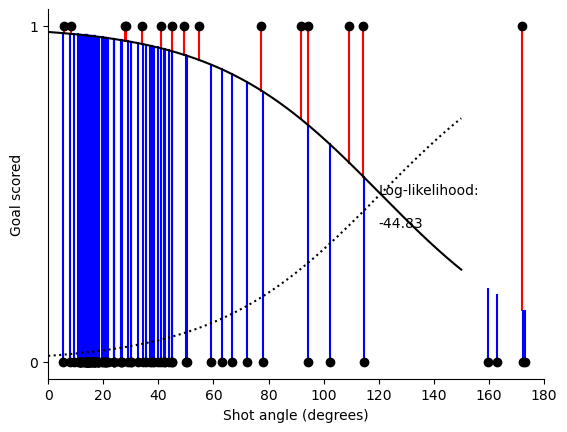

In [70]:
#calculate xG
xG = 1/(1+np.exp(b[0]+b[1]*shots['Angle']))
shots = shots.assign(xG = xG)
shots_100 = shots.iloc[:100]
fig, ax = plt.subplots()
#plot data
ax.plot(shots_100['Angle']*180/np.pi, shots_100['Goal'], linestyle='none', marker= '.', markersize= 12, color='black', zorder = 3)
#plot curves
ax.plot(x, y, linestyle=':', color='black', zorder = 2)
ax.plot(x, 1-y, linestyle='solid', color='black', zorder = 2)
#calculate loglikelihood
loglikelihood=0
for item,shot in shots_100.iterrows():
    ang = shot['Angle'] * 180/np.pi
    if shot['Goal'] == 1:
        loglikelihood = loglikelihood + np.log(shot['xG'])
        ax.plot([ang,ang],[shot['Goal'],1-shot['xG']], color='red', zorder = 1)
    else:
        loglikelihood = loglikelihood + np.log(1 - shot['xG'])
        ax.plot([ang,ang], [shot['Goal'], 1-shot['xG']], color='blue', zorder = 1)
#make legend
ax.set_ylabel('Goal scored')
ax.set_xlabel("Shot angle (degrees)")
plt.ylim((-0.05,1.05))
plt.xlim((0,180))
plt.text(120,0.5,'Log-likelihood:')
plt.text(120,0.4,str(loglikelihood)[:6])
ax.set_yticks([0,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                40461
Model:                                GLM   Df Residuals:                    40459
Model Family:                    Binomial   Df Model:                            1
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -13033.
Date:                    Sat, 20 Jul 2024   Deviance:                       26067.
Time:                            15:55:53   Pearson chi2:                 3.90e+04
No. Iterations:                         5   Pseudo R-squ. (CS):            0.02957
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

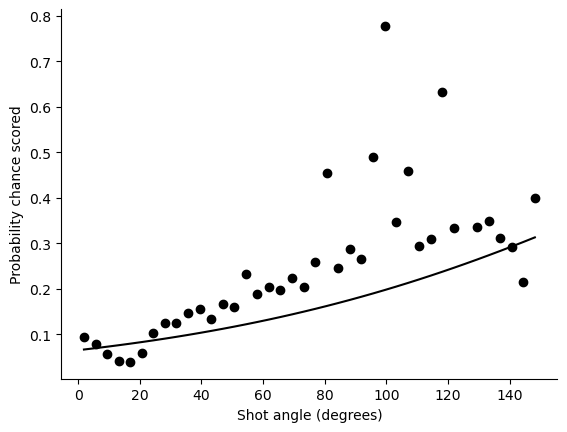

In [71]:
test_model = smf.glm(formula="Goal ~ Angle" , data=shots,
                           family=sm.families.Binomial()).fit()
print(test_model.summary())
#get params
b=test_model.params
#calculate xG
xGprob = 1/(1+np.exp(b[0]+b[1]*midangle*np.pi/180))
fig, ax = plt.subplots()
#plot data
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
#plot line
ax.plot(midangle, xGprob, linestyle='solid', color='black')
#make legend
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot angle (degrees)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                40461
Model:                                GLM   Df Residuals:                    40459
Model Family:                    Binomial   Df Model:                            1
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -12001.
Date:                    Sat, 20 Jul 2024   Deviance:                       24003.
Time:                            15:56:21   Pearson chi2:                 8.63e+06
No. Iterations:                         7   Pseudo R-squ. (CS):            0.07782
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

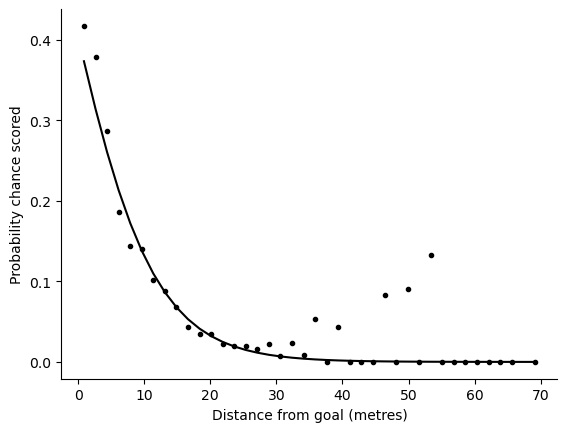

In [72]:
#number of shots
shotcount_dist = np.histogram(shots['Distance'],bins=40,range=[0, 70])
#number of goals
goalcount_dist = np.histogram(goals['Distance'],bins=40,range=[0, 70])
#empirical probability of scoring
prob_goal = np.divide(goalcount_dist[0],shotcount_dist[0])
distance = shotcount_dist[1]
middistance= (distance[:-1] + distance[1:])/2
#making a plot
fig, ax = plt.subplots()
#plotting data
ax.plot(middistance, prob_goal, linestyle='none', marker= '.', color='black')
#making legend
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Distance from goal (metres)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


#make single variable model of distance
test_model = smf.glm(formula="Goal ~ Distance" , data=shots,
                           family=sm.families.Binomial()).fit()
#print summary
print(test_model.summary())
b=test_model.params
#calculate xG
xGprob=1/(1+np.exp(b[0]+b[1]*middistance))
#plot line
ax.plot(middistance, xGprob, linestyle='solid', color='black')
plt.show()

                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                40461
Model:                                GLM   Df Residuals:                    40458
Model Family:                    Binomial   Df Model:                            2
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -11925.
Date:                    Sat, 20 Jul 2024   Deviance:                       23850.
Time:                            15:58:16   Pearson chi2:                 4.16e+04
No. Iterations:                         6   Pseudo R-squ. (CS):            0.08129
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

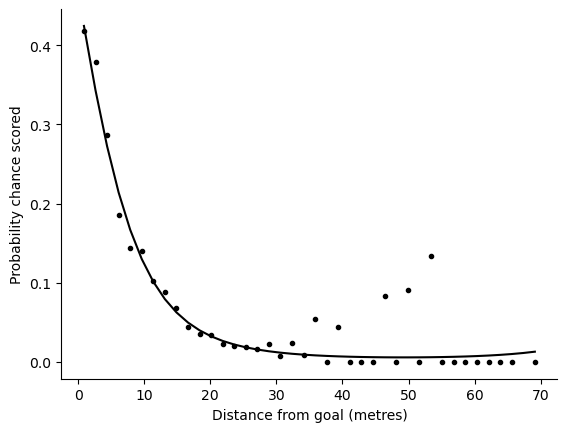

In [74]:
#calculating distance squared
shots["D2"] = shots['Distance']**2
#adding it to the model
test_model = smf.glm(formula="Goal ~ Distance + D2" , data=shots,
                           family=sm.families.Binomial()).fit()
#print model summary
print(test_model.summary())
#get parameters
b=test_model.params
#calculate xG
xGprob=1/(1+np.exp(b[0]+b[1]*middistance+b[2]*pow(middistance,2)))
fig, ax = plt.subplots()
#plot line
ax.plot(middistance, prob_goal, linestyle='none', marker= '.', color='black')
#make legend
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Distance from goal (metres)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.plot(middistance, xGprob, linestyle='solid', color='black')
plt.show()


                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                40461
Model:                                GLM   Df Residuals:                    40453
Model Family:                    Binomial   Df Model:                            7
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -11782.
Date:                    Sat, 20 Jul 2024   Deviance:                       23564.
Time:                            15:58:20   Pearson chi2:                 4.06e+04
No. Iterations:                         7   Pseudo R-squ. (CS):            0.08777
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

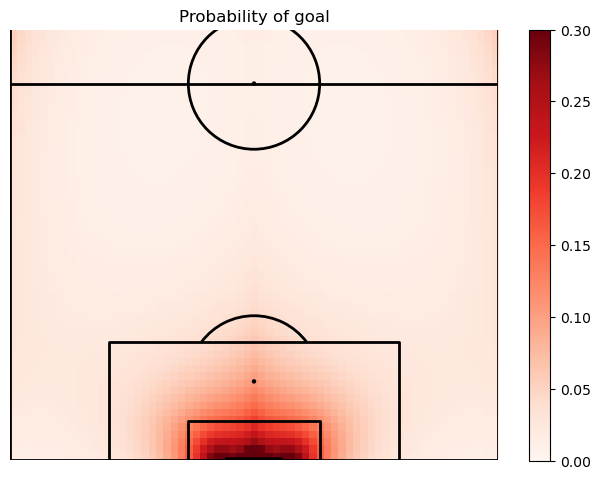

In [75]:
#creating extra variables
shots["X2"] = shots['X']**2
shots["C2"] = shots['C']**2
shots["AX"]  = shots['Angle']*shots['X']

# list the model variables you want here
model_variables = ['Angle','Distance','X','C', "X2", "C2", "AX"]
model=''
for v in model_variables[:-1]:
    model = model  + v + ' + '
model = model + model_variables[-1]

#fit the model
test_model = smf.glm(formula="Goal ~ " + model, data=shots,
                           family=sm.families.Binomial()).fit()
#print summary
print(test_model.summary())
b=test_model.params

#return xG value for more general model
def calculate_xG(sh):
   bsum=b[0]
   for i,v in enumerate(model_variables):
       bsum=bsum+b[i+1]*sh[v]
   xG = 1/(1+np.exp(bsum))
   return xG

#add an xG to my dataframe
xG=shots.apply(calculate_xG, axis=1)
shots = shots.assign(xG=xG)

#Create a 2D map of xG
pgoal_2d=np.zeros((68,68))
for x in range(68):
    for y in range(68):
        sh=dict()
        a = np.arctan(7.32 *x /(x**2 + abs(y-68/2)**2 - (7.32/2)**2))
        if a<0:
            a = np.pi + a
        sh['Angle'] = a
        sh['Distance'] = np.sqrt(x**2 + abs(y-68/2)**2)
        sh['D2'] = x**2 + abs(y-68/2)**2
        sh['X'] = x
        sh['AX'] = x*a
        sh['X2'] = x**2
        sh['C'] = abs(y-68/2)
        sh['C2'] = (y-68/2)**2

        pgoal_2d[x,y] =  calculate_xG(sh)

#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.draw()
#plot probability
pos = ax.imshow(pgoal_2d, extent=[-1,68,68,-1], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.3, zorder = 1)
fig.colorbar(pos, ax=ax)
#make legend
ax.set_title('Probability of goal')
plt.xlim((0,68))
plt.ylim((0,60))
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


Mcfaddens Rsquared 0.13624354177891684


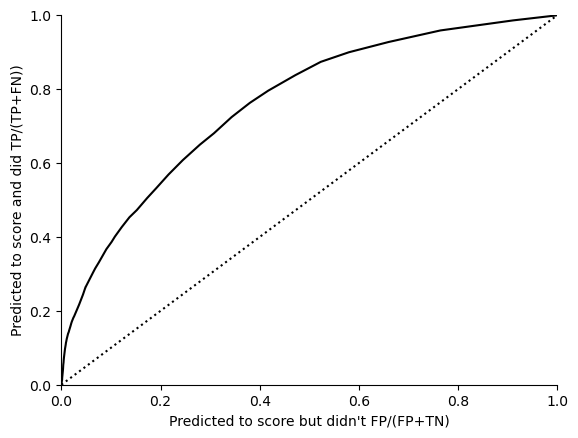

In [76]:
# Mcfaddens Rsquared for Logistic regression
null_model = smf.glm(formula="Goal ~ 1 ", data=shots,
                     family=sm.families.Binomial()).fit()
print("Mcfaddens Rsquared", 1 - test_model.llf / null_model.llf)

# ROC curve
numobs = 100
TP = np.zeros(numobs)
FP = np.zeros(numobs)
TN = np.zeros(numobs)
FN = np.zeros(numobs)

for i, threshold in enumerate(np.arange(0, 1, 1 / numobs)):
    for j, shot in shots.iterrows():
        if (shot['Goal'] == 1):
            if (shot['xG'] > threshold):
                TP[i] = TP[i] + 1
            else:
                FN[i] = FN[i] + 1
        if (shot['Goal'] == 0):
            if (shot['xG'] > threshold):
                FP[i] = FP[i] + 1
            else:
                TN[i] = TN[i] + 1

fig, ax = plt.subplots()
ax.plot(FP / (FP + TN), TP / (TP + FN), color='black')
ax.plot([0, 1], [0, 1], linestyle='dotted', color='black')
ax.set_ylabel("Predicted to score and did TP/(TP+FN))")
ax.set_xlabel("Predicted to score but didn't FP/(FP+TN)")
plt.ylim((0.00, 1.00))
plt.xlim((0.00, 1.00))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [78]:
shots.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40461 entries, 46 to 647286
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   eventId       40461 non-null  int64  
 1   subEventName  40461 non-null  object 
 2   tags          40461 non-null  object 
 3   playerId      40461 non-null  int64  
 4   positions     40461 non-null  object 
 5   matchId       40461 non-null  int64  
 6   eventName     40461 non-null  object 
 7   teamId        40461 non-null  int64  
 8   matchPeriod   40461 non-null  object 
 9   eventSec      40461 non-null  float64
 10  subEventId    40461 non-null  object 
 11  id            40461 non-null  int64  
 12  X             40461 non-null  float64
 13  Y             40461 non-null  float64
 14  C             40461 non-null  float64
 15  Distance      40461 non-null  float64
 16  Angle         40461 non-null  float64
 17  Goal          40461 non-null  object 
 18  xG            40461 non-null 

In [83]:
shots_new = shots.drop(['xG', 'D2', 'X2', 'C2', 'AX'], axis=1)

In [84]:
shots_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40461 entries, 46 to 647286
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   eventId       40461 non-null  int64  
 1   subEventName  40461 non-null  object 
 2   tags          40461 non-null  object 
 3   playerId      40461 non-null  int64  
 4   positions     40461 non-null  object 
 5   matchId       40461 non-null  int64  
 6   eventName     40461 non-null  object 
 7   teamId        40461 non-null  int64  
 8   matchPeriod   40461 non-null  object 
 9   eventSec      40461 non-null  float64
 10  subEventId    40461 non-null  object 
 11  id            40461 non-null  int64  
 12  X             40461 non-null  float64
 13  Y             40461 non-null  float64
 14  C             40461 non-null  float64
 15  Distance      40461 non-null  float64
 16  Angle         40461 non-null  float64
 17  Goal          40461 non-null  object 
dtypes: float64(6), int64(5), obje